# Set up the environment

You need to install Python, NumPy, Pandas, Matplotlib and Seaborn.

Done and ready to go.

## Imports

In [1]:
import jupyter_black

jupyter_black.load()

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split


%matplotlib inline

---

## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution. 

---

## Dataset

In this homework, we will use Credit Card Data from book "Econometric Analysis".

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
```
The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column `card`).

In [3]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv

----

### Import the Dataset

In [4]:
# Import Credit Card Data:
data = pd.read_csv("data.csv")

In [5]:
data.head(5)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [6]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [7]:
# Identify categorical and numeric Data
categorical = ["owner", "selfemp"]
numerical = [
    "reports",
    "age",
    "income",
    "share",
    "expenditure",
    "dependents",
    "months",
    "majorcards",
    "active",
]

In [8]:
# Check for nulls
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [9]:
# Describe the data:
data.describe(percentiles=[0.0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
reports,1319.0,0.456406,1.345267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,7.000000,14.00000
age,1319.0,33.213103,10.142783,0.166667,0.166667,22.666670,25.416670,31.250000,39.416670,46.916670,52.416670,62.841669,83.50000
income,1319.0,3.365376,1.693902,0.210000,0.210000,1.800000,2.243750,2.900000,4.000000,5.500000,6.900000,9.999900,13.50000
share,1319.0,0.068732,0.094656,0.000109,0.000109,0.000426,0.002316,0.038827,0.093617,0.175756,0.238776,0.450566,0.90632
expenditure,1319.0,185.057071,272.218917,0.000000,0.000000,0.000000,4.583333,101.298300,249.035800,469.457340,640.730130,1458.989600,3099.50500
dependents,1319.0,0.993935,1.247745,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,5.000000,6.00000
months,1319.0,55.267627,66.271746,0.000000,0.000000,6.000000,12.000000,30.000000,72.000000,143.200000,192.000000,300.000000,540.00000
majorcards,1319.0,0.817286,0.386579,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
active,1319.0,6.996967,6.305812,0.000000,0.000000,0.000000,2.000000,6.000000,11.000000,16.000000,19.000000,25.820000,46.00000


/var/folders/sp/2h0n9jbn0r9_6byxc4838g2m0000gn/T/ipykernel_36548/3100183651.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(bins=100, ax=ax, layout=(3, 3), column=numerical)


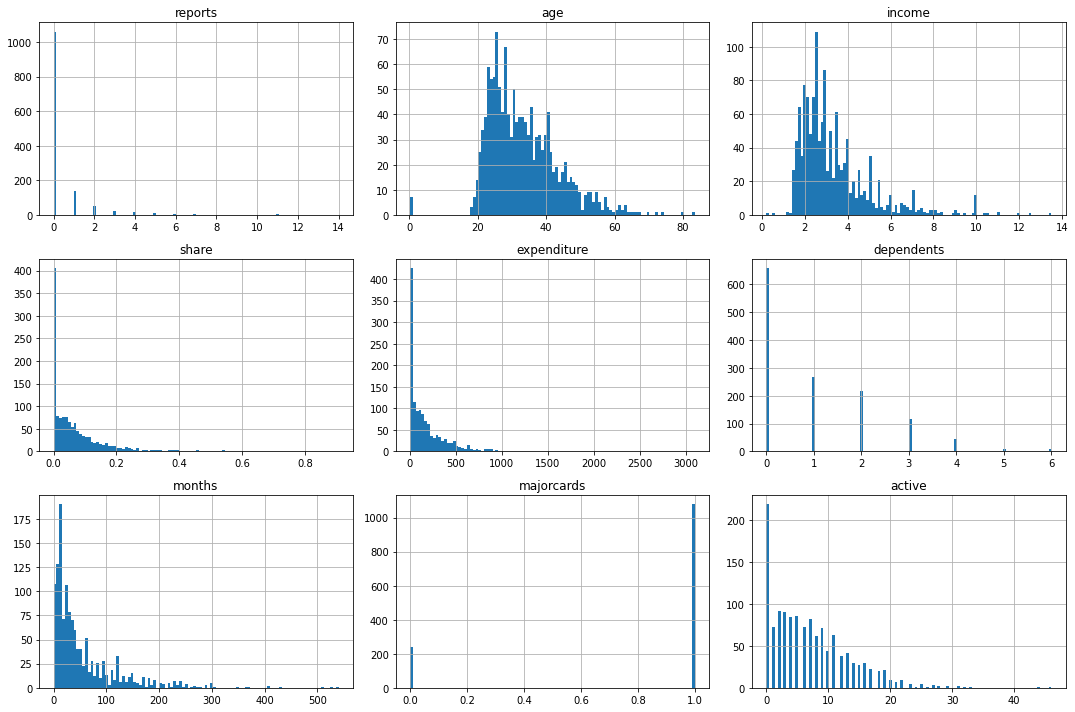

In [10]:
# Inspecting data through Histograms:
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()
data.hist(bins=100, ax=ax, layout=(3, 3), column=numerical)
plt.tight_layout()
plt.show()

---

## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0. 
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.

In [11]:
# Create the target variable by mapping yes to 1 and no to 0.
data["target"] = np.where(data.card == "yes", 1, 0)

In [12]:
# What's the distribution of the target
data.target.value_counts()

1    1023
0     296
Name: target, dtype: int64

In [13]:
# Function that takes a data frame and returns:
#  - Train, Validation and Test dataframes
#  - 60 / 20 / 20 split assumed
#  - randon seed is an optional valiable
def split_dataset(df, seed=1):
    # Create Full Train and Test Train Data frames
    df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=seed)

    # Split Full Train Data Set in Train and Validation
    df_train, df_val = train_test_split(
        df_train_full, test_size=0.25, random_state=seed
    )

    return df_train_full, df_train, df_val, df_test


# Create the Data Frames for the model
df_train_full, df_train, df_val, df_test = split_dataset(data)

---

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- **`share`**

In [14]:
# Calculate AUC for all numeric features
specific_features = [
    "reports",
    "dependents",
    "active",
    "share",
]

for feature in specific_features:
    auc = roc_auc_score(df_train["target"], df_train[feature])
    if auc < 0.5:
        auc = roc_auc_score(df_train["target"], -df_train[feature])
    print(f"{feature:>11}: {auc:.3f}")

    reports: 0.717
 dependents: 0.533
     active: 0.604
      share: 0.989


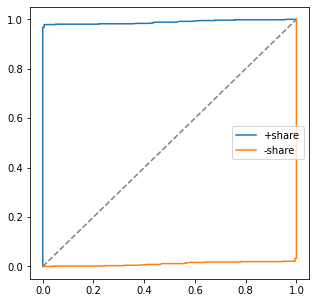

In [15]:
# Plot the AUC to see if it's positive or negative
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(df_train["target"], df_train["share"])
plt.plot(fpr, tpr, label="+share")

fpr, tpr, _ = roc_curve(df_train["target"], -df_train["share"])
plt.plot(fpr, tpr, label="-share")

plt.plot([0, 1], [0, 1], color="grey", linestyle="--")

plt.legend()
plt.show()

---

## Training the model

From now on, use these columns only:

```
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```


In [16]:
# Model Features
model_features = [
    "reports",
    "age",
    "income",
    "share",
    "expenditure",
    "dependents",
    "months",
    "majorcards",
    "active",
    "owner",
    "selfemp",
]

In [17]:
# Create the Data Frames for the model
df_train_full, df_train, df_val, df_test = split_dataset(data)

print(df_train_full.shape, df_train.shape, df_val.shape, df_test.shape)

# The values to predict
y_train_full = df_train.target.values
y_train = df_train.target.values
y_val = df_val.target.values

# Strip the data frames down to the required columns only
df_train = df_train[model_features]
df_val = df_val[model_features]
df_test = df_test[model_features]

(1055, 13) (791, 13) (264, 13) (264, 13)


In [18]:
# Create a Dictionary of the Training Data set Records
train_dict = df_train.to_dict(orient="records")

# Create the DictVectorizer object, fit and transform
# Giving the training data set
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [19]:
dv.get_feature_names_out()

array(['active', 'age', 'dependents', 'expenditure', 'income',
       'majorcards', 'months', 'owner=no', 'owner=yes', 'reports',
       'selfemp=no', 'selfemp=yes', 'share'], dtype=object)

In [20]:
# Create the model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)

# Fit the model with the Training Data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [21]:
# Create a Dictionary of the Validation Data set Records
#   and transform
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

# Predict the values
y_pred = model.predict_proba(X_val)[:, 1]

---

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- **0.995**

In [22]:
def roc_auc_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []

    for threshold in thresholds:
        scores.append((threshold, roc_auc_score(y_val, y_pred)))

    columns = ["threshold", "auc_score"]
    scores_df = pd.DataFrame(scores, columns=columns)

    return scores_df


df_scores = roc_auc_dataframe(y_val, y_pred)
df_scores.head()

,threshold,auc_score
0,0.00,0.995171
1,0.01,0.995171
2,0.02,0.995171
3,0.03,0.995171
4,0.04,0.995171


In [23]:
# Calculate the average AUC Score
round(np.mean(df_scores.auc_score.values), 3)

0.995

---

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.1
* **0.3**
* 0.6
* 0.8


In [24]:
# Function to generate precision / recall dataframe
def calculate_precision_recall(y_val, y_pred, max_threshold=101):

    # Number of thresholds
    thresholds = np.linspace(0, 1, max_threshold)

    # List to hold the scores
    scores = []

    for threshold in thresholds:
        # Actual positive and negative
        actual_positive = y_val == 1
        actual_negative = y_val == 0

        # Predicted positive and negative
        predict_positive = y_pred >= threshold
        predict_negative = y_pred < threshold

        # Calculate tp, tn, fp, fn
        tp = (actual_positive & predict_positive).sum()
        tn = (actual_negative & predict_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        # Add to scores
        scores.append((threshold, tp, tn, fp, fn))

    columns = ["threshold", "tp", "tn", "fp", "fn"]
    scores_df = pd.DataFrame(scores, columns=columns)

    # Calculate precision & recall
    scores_df["precision"] = scores_df.tp / (scores_df.tp + scores_df.fp)
    scores_df["recall"] = scores_df.tp / (scores_df.tp + scores_df.fn)

    return scores_df

In [25]:
# Calculate precision & recall
scores = calculate_precision_recall(y_val, y_pred)

In [26]:
scores.head(5)

,threshold,tp,tn,fp,fn,precision,recall
0,0.00,211,0,53,0,0.799242,1.0
1,0.01,211,19,34,0,0.861224,1.0
2,0.02,211,22,31,0,0.871901,1.0
3,0.03,211,29,24,0,0.897872,1.0
4,0.04,211,31,22,0,0.905579,1.0


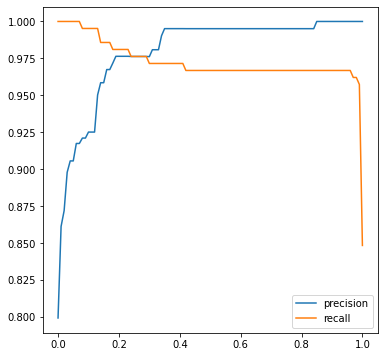

In [27]:
# Plot the Precision & Recall Graphs
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(scores.threshold, scores.precision, label="precision")
plt.plot(scores.threshold, scores.recall, label="recall")
plt.legend()

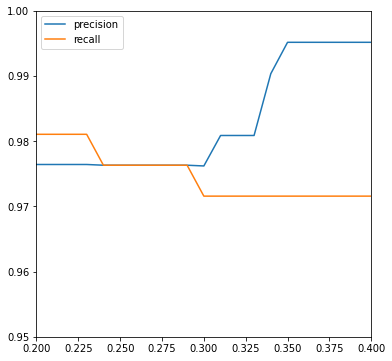

In [28]:
# Zoom in on the intersection
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(scores.threshold, scores.precision, label="precision")
plt.plot(scores.threshold, scores.recall, label="recall")
plt.xlim([0.2, 0.4])
plt.ylim([0.95, 1.0])
plt.legend()

In [29]:
# Rerun with more points
# Calculate precision & recall
fine_scores = calculate_precision_recall(y_val, y_pred, 1001)

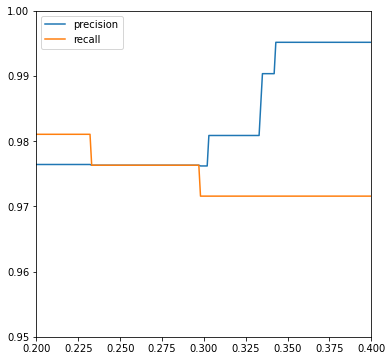

In [30]:
# Zoom in on the intersection
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(fine_scores.threshold, fine_scores.precision, label="precision")
plt.plot(fine_scores.threshold, fine_scores.recall, label="recall")
plt.xlim([0.2, 0.4])
plt.ylim([0.95, 1.0])
plt.legend()

In [31]:
# At what thresholds is precision == recall
scores[scores.precision == scores.recall]

,threshold,tp,tn,fp,fn,precision,recall
24,0.24,206,48,5,5,0.976303,0.976303
25,0.25,206,48,5,5,0.976303,0.976303
26,0.26,206,48,5,5,0.976303,0.976303
27,0.27,206,48,5,5,0.976303,0.976303
28,0.28,206,48,5,5,0.976303,0.976303
29,0.29,206,48,5,5,0.976303,0.976303


---

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- **0.4**
- 0.6
- 0.7

In [32]:
# Calculate the F1 score using the given formula
scores["f1"] = 2 * scores.precision * scores.recall / (scores.precision + scores.recall)
scores[::10]

,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.0,211,0,53,0,0.799242,1.000000,0.888421
10,0.1,210,36,17,1,0.925110,0.995261,0.958904
20,0.2,207,48,5,4,0.976415,0.981043,0.978723
30,0.3,205,48,5,6,0.976190,0.971564,0.973872
40,0.4,205,52,1,6,0.995146,0.971564,0.983213
50,0.5,204,52,1,7,0.995122,0.966825,0.980769
60,0.6,204,52,1,7,0.995122,0.966825,0.980769
70,0.7,204,52,1,7,0.995122,0.966825,0.980769
80,0.8,204,52,1,7,0.995122,0.966825,0.980769
90,0.9,204,53,0,7,1.000000,0.966825,0.983133


In [33]:
# F1 appears to max out around 0.4
# Find the exact value
scores[scores.f1 == scores.f1.max()]

,threshold,tp,tn,fp,fn,precision,recall,f1
35,0.35,205,52,1,6,0.995146,0.971564,0.983213
36,0.36,205,52,1,6,0.995146,0.971564,0.983213
37,0.37,205,52,1,6,0.995146,0.971564,0.983213
38,0.38,205,52,1,6,0.995146,0.971564,0.983213
39,0.39,205,52,1,6,0.995146,0.971564,0.983213
40,0.40,205,52,1,6,0.995146,0.971564,0.983213
41,0.41,205,52,1,6,0.995146,0.971564,0.983213


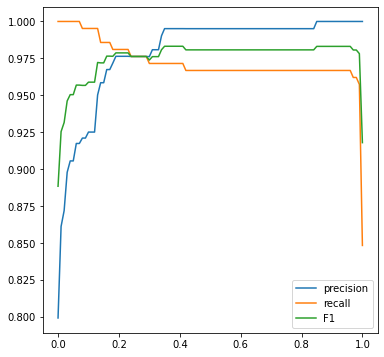

In [34]:
# Plot the Precision, Recall & F1 Graphs
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(scores.threshold, scores.precision, label="precision")
plt.plot(scores.threshold, scores.recall, label="recall")
plt.plot(scores.threshold, scores.f1, label="F1")
plt.legend()

---

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores a different folds?

- **0.003**
- 0.014
- 0.09
- 0.24

In [35]:
# Create a K-Fold object
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

In [36]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[model_features].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver="liblinear", C=C)
    model.fit(X_train, y_train)

    return dv, model


def predict(df, dv, model):
    dicts = df[model_features].to_dict(orient="records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [37]:
scores = []

for train_idx, val_idx in k_fold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.target.values
    y_val = df_val.target.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(f"Mean AUC: {np.mean(scores):.3f}")
print(f"STD:   +- {np.std(scores):.3f}")

Mean AUC: 0.996
STD:   +- 0.003


---

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

- 0.01
- 0.1
- **1**
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [38]:
for C in [0.01, 0.1, 1, 10]:

    scores = []

    for train_idx, val_idx in k_fold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.target.values
        y_val = df_val.target.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f"C: {C}")
    print(f"Mean AUC: {np.mean(scores):.3f}")
    print(f"STD:   +- {np.std(scores):.3f}")
    print()

C: 0.01
Mean AUC: 0.992
STD:   +- 0.006

C: 0.1
Mean AUC: 0.995
STD:   +- 0.004

C: 1
Mean AUC: 0.996
STD:   +- 0.003

C: 10
Mean AUC: 0.996
STD:   +- 0.003



---

# Learning in Public

* https://twitter.com/David__Colton/status/1573821398816104449?s=20&t=tyXbtp3yvm_3Eweduhxk2g
* https://twitter.com/David__Colton/status/1573993447647838208?s=20&t=iw0cuqExVGf2C6v_hHMiXw
* https://twitter.com/David__Colton/status/1574080451408531458?s=20&t=L_chgGqSgN0Kl0dfbuqSXg
* https://twitter.com/David__Colton/status/1574484166682591251?s=20&t=Bx6OOGRWCNqtS8Jg_0KpRg
* https://twitter.com/David__Colton/status/1574671398773166080?s=20&t=iEGHEZ0slG-QErPo8VrNyQ
* https://twitter.com/David__Colton/status/1574673547720642560?s=20&t=bP_fnnLl77tXTUk0lbvmsw
* https://twitter.com/David__Colton/status/1574884668435988480?s=20&t=LJo9k-UiXpRkdAXZ2B_bXw
* https://twitter.com/David__Colton/status/1575247940376985600?s=20&t=mOXgJv478hnvk3v4yvXbYA